# Observable trends


* max temperature drop significantly when we are heading to the (north pole our south pole) compared to the equator.
----

* couldn't find big different for wind speed at the time of data being taken, however it rases little bit towards the north and south pole
----

* the southern hemisphere trends more hotter temperature degrees than the northern hemisphere at  time of data being collected, which make sense as the southern hemisphere is in Summer season while winter season in the Northern hemisphere   
----


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#convert a list to dataframe to save later
df = pd.DataFrame(cities) 
# saving the dataframe 
df.to_csv('../output_data/cities.csv')


# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [9]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"
raw_data=[]


# Build query URL

for idx,city in enumerate(cities):
    t = time.localtime()
    current_time=time.strftime("%H:%M:%S", t)
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url)
   
    if (weather_response.json()['cod'])!='404':
        raw_data.append(weather_response.json())
        print(f"{current_time} index= {idx} city={city}")
    else:
        print(f"{current_time} index= {idx} city={city} Failed to get data")
    
    weather_response
    if (idx+1)%50==0: 
        
        print("wait for 60 seconds")
        time.sleep(60)
        

raw_data
    

18:00:14 index= 0 city=yellowknife
18:00:15 index= 1 city=barrow
18:00:17 index= 2 city=hobart
18:00:18 index= 3 city=vila velha
18:00:19 index= 4 city=east london
18:00:20 index= 5 city=umzimvubu Failed to get data
18:00:21 index= 6 city=saint-augustin
18:00:22 index= 7 city=kapaa
18:00:22 index= 8 city=rundu
18:00:23 index= 9 city=khatanga
18:00:24 index= 10 city=taolanaro Failed to get data
18:00:25 index= 11 city=mataura
18:00:25 index= 12 city=bluff
18:00:26 index= 13 city=palabuhanratu Failed to get data
18:00:27 index= 14 city=severo-kurilsk
18:00:27 index= 15 city=jamestown
18:00:27 index= 16 city=ushuaia
18:00:28 index= 17 city=nikolskoye
18:00:29 index= 18 city=opuwo
18:00:29 index= 19 city=waingapu
18:00:30 index= 20 city=nara
18:00:31 index= 21 city=cabo san lucas
18:00:31 index= 22 city=dikson
18:00:32 index= 23 city=kaitangata
18:00:33 index= 24 city=komsomolskiy
18:00:34 index= 25 city=saldanha
18:00:34 index= 26 city=port alfred
18:00:35 index= 27 city=qaanaaq
18:00:36 

18:06:47 index= 226 city=klaksvik
18:06:48 index= 227 city=noumea
18:06:48 index= 228 city=vaitupu Failed to get data
18:06:49 index= 229 city=ranong
18:06:49 index= 230 city=bambanglipuro
18:06:50 index= 231 city=chuy
18:06:51 index= 232 city=kharitonovo
18:06:52 index= 233 city=manakara
18:06:52 index= 234 city=ornskoldsvik
18:06:53 index= 235 city=zafra
18:06:54 index= 236 city=lompoc
18:06:54 index= 237 city=elizabeth city
18:06:55 index= 238 city=cockburn harbour Failed to get data
18:06:55 index= 239 city=kodinsk
18:06:56 index= 240 city=erdenet
18:06:57 index= 241 city=brae
18:06:57 index= 242 city=faya
18:06:58 index= 243 city=portland
18:06:58 index= 244 city=narsaq
18:06:59 index= 245 city=haines junction
18:07:00 index= 246 city=miri
18:07:00 index= 247 city=fairbanks
18:07:01 index= 248 city=nizhniy tsasuchey
18:07:02 index= 249 city=minna
wait for 60 seconds
18:08:02 index= 250 city=hambantota
18:08:03 index= 251 city=lasa
18:08:04 index= 252 city=mana
18:08:04 index= 253 

18:14:15 index= 451 city=tiarei
18:14:16 index= 452 city=nioro
18:14:17 index= 453 city=ghatanji
18:14:18 index= 454 city=seydi
18:14:18 index= 455 city=moerai
18:14:19 index= 456 city=antalaha
18:14:20 index= 457 city=deming
18:14:20 index= 458 city=amapa
18:14:21 index= 459 city=neya
18:14:22 index= 460 city=drayton valley
18:14:23 index= 461 city=srednekolymsk
18:14:23 index= 462 city=mislinja
18:14:24 index= 463 city=zaporizhzhya
18:14:25 index= 464 city=paradwip Failed to get data
18:14:25 index= 465 city=kiruna
18:14:26 index= 466 city=mangrol
18:14:27 index= 467 city=mapastepec
18:14:27 index= 468 city=plouzane
18:14:28 index= 469 city=eregli
18:14:29 index= 470 city=tingrela Failed to get data
18:14:29 index= 471 city=ondorhaan Failed to get data
18:14:30 index= 472 city=mahebourg
18:14:30 index= 473 city=usingen
18:14:31 index= 474 city=mount gambier
18:14:32 index= 475 city=gilgit
18:14:32 index= 476 city=cordoba
18:14:33 index= 477 city=chimbote
18:14:34 index= 478 city=guer

[{'coord': {'lon': -114.3525, 'lat': 62.456},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': -19.23,
   'feels_like': -31.11,
   'temp_min': -22.72,
   'temp_max': -17.59,
   'pressure': 1038,
   'humidity': 85},
  'visibility': 10000,
  'wind': {'speed': 4, 'deg': 180},
  'clouds': {'all': 100},
  'dt': 1641798015,
  'sys': {'type': 2,
   'id': 2041581,
   'country': 'CA',
   'sunrise': 1641833694,
   'sunset': 1641854080},
  'timezone': -25200,
  'id': 6185377,
  'name': 'Yellowknife',
  'cod': 200},
 {'coord': {'lon': -156.7887, 'lat': 71.2906},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': -16.58,
   'feels_like': -16.58,
   'temp_min': -16.58,
   'temp_max': -16.58,
   'pressure': 1027,
   'humidity': 69},
  'visibility': 10000,
  'wind': {'speed': 0, 'deg': 0},
  'clouds': {'all': 1},
  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_data_df=pd.DataFrame(columns=['name','country','lon','lat','humidity','temp_max','wind_speed','cloudness'])
for i in range(len(raw_data)):
    weather_data_df=weather_data_df.append({'lon'     :raw_data[i]['coord']['lon'],
                            'lat'     :raw_data[i]['coord']['lat'],
                            'country' :raw_data[i]['sys']['country'],
                            'humidity':raw_data[i]['main']['humidity'],
                            'temp_max':raw_data[i]['main']['temp_max'],
                            'name'    :raw_data[i]['name'],
                            'wind_speed'    :raw_data[i]['wind']['speed'],
                            'cloudness'    :raw_data[i]['clouds']['all'],
                           }, ignore_index=True)
    

weather_data_df.to_csv('../output_data/City_Coord_data.csv')
print(weather_data_df['name'].nunique())
weather_data_df

544


,name,country,lon,lat,humidity,temp_max,wind_speed,cloudness
0,Yellowknife,CA,-114.3525,62.4560,85,-17.59,4,100
1,Barrow,US,-156.7887,71.2906,69,-16.58,0,1
2,Hobart,AU,147.3294,-42.8794,70,62.02,1.01,75
3,Vila Velha,BR,-40.2925,-20.3297,97,73.94,7.43,100
4,East London,ZA,27.9116,-33.0153,77,75.51,6.31,100
...,...,...,...,...,...,...,...,...
539,Huarmey,PE,-78.1522,-10.0681,83,70.25,7.11,15
540,Mabaruma,GY,-59.7833,8.2000,96,69.06,2.37,98
541,Philadelphia,US,-75.1638,39.9523,65,38.19,5.99,0
542,Bac Lieu,VN,105.7244,9.2850,61,84.54,19.13,70


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_data_df.astype({'humidity': 'int32'}).dtypes
over_humi_index=[]
for idx,city in enumerate(weather_data_df.iterrows()):
    if city[1]['humidity']>100:
        over_humi_index.append(idx)
        
weather_data_df
over_humi_index

[]

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data_df.drop(over_humi_index,inplace=False)

In [23]:
#print the clean data frame
clean_city_data



,name,country,lon,lat,humidity,temp_max,wind_speed,cloudness
0,Yellowknife,CA,-114.3525,62.4560,85,-17.59,4,100
1,Barrow,US,-156.7887,71.2906,69,-16.58,0,1
2,Hobart,AU,147.3294,-42.8794,70,62.02,1.01,75
3,Vila Velha,BR,-40.2925,-20.3297,97,73.94,7.43,100
4,East London,ZA,27.9116,-33.0153,77,75.51,6.31,100
...,...,...,...,...,...,...,...,...
539,Huarmey,PE,-78.1522,-10.0681,83,70.25,7.11,15
540,Mabaruma,GY,-59.7833,8.2000,96,69.06,2.37,98
541,Philadelphia,US,-75.1638,39.9523,65,38.19,5.99,0
542,Bac Lieu,VN,105.7244,9.2850,61,84.54,19.13,70


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

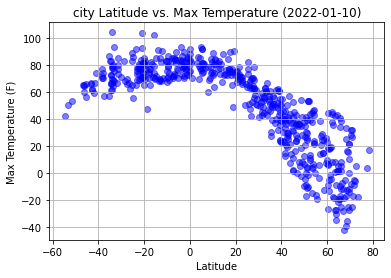

In [24]:
from datetime import date
#scatter plot, passing  column Latitude and temperature column from clean data set 
plt.scatter(clean_city_data['lat'], clean_city_data['temp_max'],  c="b", alpha=0.5, marker='o')

#setting the figure title and labels
plt.title(f'city Latitude vs. Max Temperature ({date.today()})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#save and display
plt.savefig("../Images/Latitude_vs_Temperature.png")
plt.show()


## Figure1 Temperature VS Latitude
- this figure is the result of scatter plotting the cleaned date frame, the city latitude coordinate being used as x axis while city temperature is used as y axis.
- model datetime has been added to the code, so we can get the current date

- as we can see in this figure the temperature goes down i.e the weather it become colder as we move north the Equator, it is winter in the northern hemisphere at the time of this data have been collected

## Latitude vs. Humidity Plot

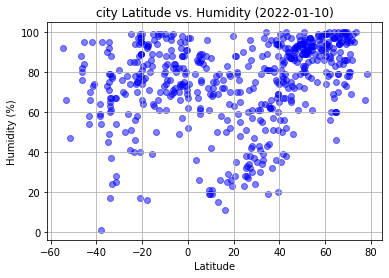

In [25]:
#scatter plot, passing  column Latitude and Humidity column from clean data set 
plt.scatter(clean_city_data['lat'], clean_city_data['humidity'],  c="b", alpha=0.5, marker='o')

#setting the figure title and labels
plt.title(f'city Latitude vs. Humidity ({date.today()})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#save and display
plt.savefig("../Images/Latitude_vs_Humidity.png")
plt.show()

## Figure2 Humidity VS Latitude
- this figure is the result of scatter plotting the cleaned date frame, the city latitude coordinate being used as x axis while cityhumidity is used as y axis.
- model datetime has been added to the code, so we can get the current date

- it looks symmetric, Latitude has not much impact on humidity at the time that the data has been collected, and we can see more results for cities upper latitude 40 as the northern hemisphere has more land than the Southern hemisphere  

## Latitude vs. Cloudiness Plot

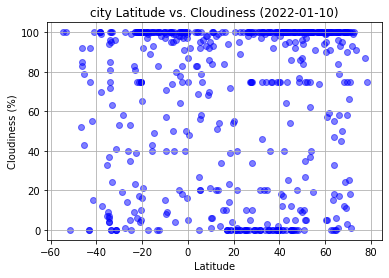

In [20]:
#scatter plot, passing  column Latitude and Cloudiness column from clean data set 
plt.scatter(clean_city_data['lat'], clean_city_data['cloudness'],  c="b", alpha=0.5, marker='o')

#setting the figure title and labels
plt.title(f'city Latitude vs. Cloudiness ({date.today()})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#save and display
plt.savefig("../Images/Latitude_vs_Cloudiness.png")
plt.show()


## Figure 3 Cloudiness VS Latitude

- this figure is the result of scatter plotting the cleaned date frame, the city latitude coordinate being used as x axis while the city cloudiness is used as y axis.
- model datetime has been added to the code, so we can get the current date

- the southern hemisphere (between (0 to -20) looks has more clouds than the northern hemisphere, however we can see more clouds in the northern hemisphere between (35 to 75)


## Latitude vs. Wind Speed Plot

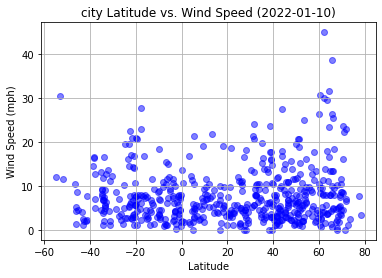

In [26]:
#scatter plot, passing  column Latitude and WindSpeed column from clean data set 
plt.scatter(clean_city_data['lat'], clean_city_data['wind_speed'],  c="b", alpha=0.5, marker='o')

#setting the figure title and labels
plt.title(f'city Latitude vs. Wind Speed ({date.today()})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#save and display
plt.savefig("../Images/Latitude_vs_WindSpeed.png")
plt.show()


## Figure 4 Wind Speed VS Latitude
- this figure is the result of scatter plotting the cleaned date frame, the city latitude coordinate being used as x axis while the city wind speed in MPH is used as y axis.
- model datetime has been added to the code, so we can get the current date
- on average, wind speed at the Northern hemisphere looks faster than the wind speed on southern hemisphere,



## Linear Regression

In [76]:
# northern and southren hemisphare are calculated here for later use
North_hemi=clean_city_data.loc[clean_city_data['lat']>=0]
South_hemi=clean_city_data.loc[clean_city_data['lat']<0]


,name,country,lon,lat,humidity,temp_max,wind_speed,cloudness
0,Yellowknife,CA,-114.3525,62.4560,85,-17.59,4,100
1,Barrow,US,-156.7887,71.2906,69,-16.58,0,1
5,Saint-Augustin,CA,-58.6502,51.2260,83,29.89,18.81,100
6,Kapaa,US,-159.3190,22.0752,59,69.78,2.95,0
8,Khatanga,RU,102.5000,71.9667,99,-5.42,6.55,99
...,...,...,...,...,...,...,...,...
537,Aktas,KZ,72.9608,49.7789,92,6.55,6.49,9
540,Mabaruma,GY,-59.7833,8.2000,96,69.06,2.37,98
541,Philadelphia,US,-75.1638,39.9523,65,38.19,5.99,0
542,Bac Lieu,VN,105.7244,9.2850,61,84.54,19.13,70


In [87]:
# function to drow scatter plots and calculate a linear regression for the data fram that recieved and return a scatter plot
# as x axis is fixed (lattude) then we dont need to pass it to the function the only values that need to pass are as follow
    # hemisphere flag 
    # what attribute we want to scatter
    # y label as we want to disply more data like (MPH and(F))
def plotting(attrib,hemisphere,ylabel):
    if hemisphere=='Northern':
        xr=plt.scatter(North_hemi['lat'], North_hemi[attrib],  c="b", alpha=0.5, marker='o')

        #calculate the linearregression then  plot the calcuculated information
        (slope, intercept, rvalue, pvalue, stderr) = linregress(North_hemi['lat'], North_hemi[attrib].astype(float))
        regress_values = North_hemi['lat'] * slope + intercept
        xr=plt.plot(North_hemi['lat'],regress_values,'#000000',linewidth=2,linestyle='dashed')
    else:
        xr=plt.scatter(South_hemi['lat'], South_hemi[attrib],  c="b", alpha=0.5, marker='o')
        
        #calculate the linearregression then  plot calcuculated information
        (slope, intercept, rvalue, pvalue, stderr) = linregress(South_hemi['lat'], South_hemi[attrib].astype(float))
        regress_values = South_hemi['lat'] * slope + intercept
        xr=plt.plot(South_hemi['lat'],regress_values,'#000000',linewidth=2,linestyle='dashed')
        
        
    #setting the figure title and labels
    plt.title(f'{hemisphere} Hemisphere - Latitude vs. {ylabel}\n Linear Regression')
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.grid()
    
    #save and display
    plt.savefig(f'../Images/{hemisphere} Hemisphere - Latitude vs. {ylabel} Linear Regression.png')
    plt.show()

    return(xr)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

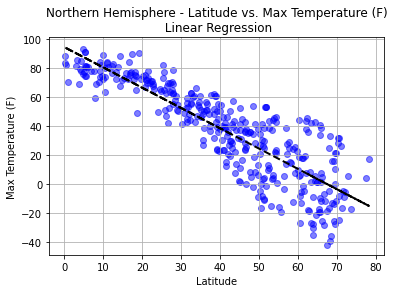

In [88]:
#scatter plotting the Latitude vs max Tempruture for the Northern Hemisphere
#the figure will be saved in the def function
#all the coding was handeled in the def function
plotting('temp_max','Northern','Max Temperature (F)')

## <span style="color:blue">Explanation</span>
at the time of data being collected and analysed. 
the linear regression shows **<span style="color:blue">significant drop in temperature</span>** while we are heading to the north of the Northern Hemisphere



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

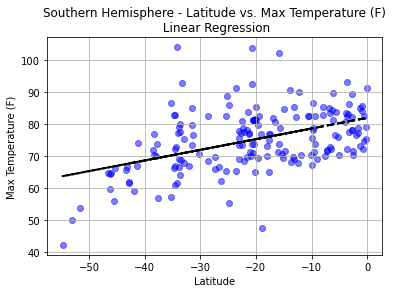

In [98]:
#scatter plotting the Latitude vs max Tempruture for the Southern Hemisphere
#the figure will be saved in the def function
#all the coding was handeled in the def function
plotting('temp_max','Southern','Max Temperature (F)')

## <span style="color:blue">Explanation</span>
at the time of data being collected and analysed. 
the linear regression shows **<span style="color:blue">drop in temperature</span>** while we are heading to the south of the Southern Hemisphere


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

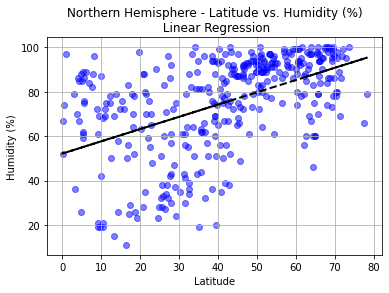

In [100]:
#scatter plotting the Latitude vs Humidity (%) for the Northern Hemisphere
#the figure will be saved in the def function
#all the coding was handeled in the def function
plotting('humidity','Northern','Humidity (%)')

## <span style="color:blue">Explanation</span>
at the time of data being collected and analysed. 
the linear regression shows **<span style="color:blue">significant raise in Humidity</span>** while we are heading to the north of the Northern Hemisphere



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

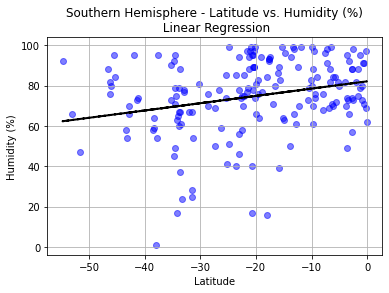

In [101]:
#scatter plotting the Latitude vs Humidity (%) for the Southern Hemisphere
#the figure will be saved in the def function
#all the coding was handeled in the def function
plotting('humidity','Southern','Humidity (%)')

## <span style="color:blue">Explanation</span>
at the time of data being collected and analysed. 
the linear regression shows **<span style="color:blue">drop in Humidity</span>** while we are heading to the south of the Southern Hemisphere



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

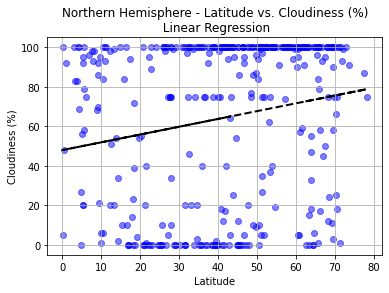

In [92]:
#scatter plotting the Latitude vs Cloudiness (%) for the Southern Hemisphere
#the figure will be saved in the def function
#all the coding was handeled in the def function
plotting('cloudness','Northern','Cloudiness (%)')

## <span style="color:blue">Explanation</span>
at the time of data being collected and analysed. 
the linear regression shows **<span style="color:blue">significant raise in Cloudiness</span>** while we are heading to the north of the Northern Hemisphere



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

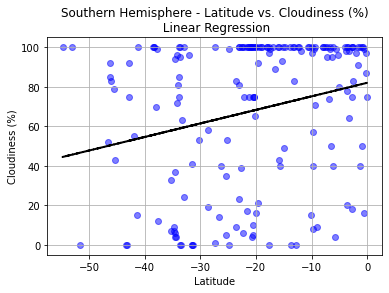

In [93]:
#scatter plotting the Latitude vs Cloudiness (%) for the Southern Hemisphere
#the figure will be saved in the def function
#all the coding was handeled in the def function
plotting('cloudness','Southern','Cloudiness (%)')

## <span style="color:blue">Explanation</span>
at the time of data being collected and analysed. 
the linear regression shows **<span style="color:blue">significant drop in cloudiness</span>** while we are heading to the south of the Southern Hemisphere



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

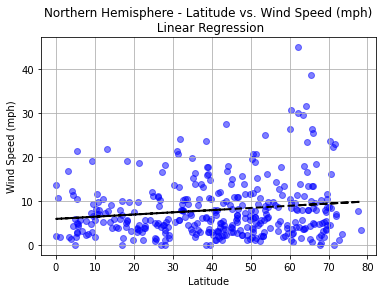

In [94]:
#scatter plotting the Latitude vs Wind Speed (mph) for the Northern Hemisphere
#the figure will be saved in the def function
#all the coding was handeled in the def function
plotting('wind_speed','Northern','Wind Speed (mph)')

## <span style="color:blue">Explanation</span>
at the time of data being collected and analysed. 
the linear regression shows **<span style="color:blue">almost no rais in wind speed</span>** while we are heading to the north of the Northern Hemisphere



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

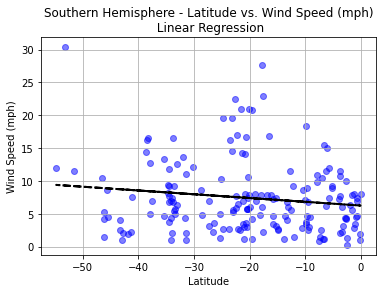

In [95]:
#scatter plotting the Latitude vs Wind Speed (mph) for the Southern Hemisphere
#the figure will be saved in the def function
#all the coding was handeled in the def function
plotting('wind_speed','Southern','Wind Speed (mph)')

## <span style="color:blue">Explanation</span>
at the time of data being collected and analysed. 
the linear regression shows **<span style="color:blue">almost no rais in wind speed</span>** while we are heading to the south of the Southern Hemisphere

